In [37]:
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as pl
from matplotlib.animation import FuncAnimation 
import numpy as np
class Body:
    def __init__(self, x, y, vx, vy, m):
        self.x=x
        self.y=y
        self.vx=vx
        self.vy=vy
        self.m=m

class Simulation:
    G = 1
    def __init__(self, deltat, bodies, end):
        self.deltat = deltat
        self.bodies = bodies
        self.end = end
        self.elapsed = 0
        self.fig = pl.figure(figsize=(8,8),constrained_layout=True)
        spec = self.fig.add_gridspec(nrows=1,ncols=1)
        mx = max([abs(i.x) for i in bodies])
        my = max([abs(i.y) for i in bodies])
        self.ax = self.fig.add_subplot(spec[0,0],xlim=(-mx-1,mx+1), ylim=(-my-1,my+1))
        self.anim = FuncAnimation(self.fig, self.update, init_func=self.initPos, frames=200000, interval=10, blit=True)
        
    def initPos(self):
        x = []
        y = []
        for i in self.bodies:
            x.append(i.x)
            y.append(i.y)
        self.ax.scatter(x,y)
        return self.ax,
        
    def getDistance(self,i,j):
        distance=np.sqrt((i.x-j.x)**2 + (i.y-j.y)**2)
        return distance
    
    def accelerations(self,i,j):
        r=self.getDistance(i,j)
        ax=Simulation.G*j.m*(j.x-i.x)/r**3
        ay=Simulation.G*j.m*(j.y-i.y)/r**3
        return ax,ay
    
    def update(self):
        bodies=self.bodies
        temp=[]
        if(self.elapsed<end):
            for i in range(len(bodies)):
                ax=0
                ay=0
                for j in range(len(bodies)):
                    if(i!=j):
                        incax,incay=self.accelerations(bodies[i],bodies[j])
                        ax+=incax
                        ay+=incay
                vxn=bodies[i].vx+ax*self.deltat
                vyn=bodies[i].vy+ay*self.deltat
                xn=bodies[i].x+bodies[i].vx*self.deltat
                yn=bodies[i].y+bodies[i].vy*self.deltat
                obj=Body(xn,yn,vxn,vyn,bodies[i].m)
                temp.append(obj)
                self.elapsed += deltat
            self.bodies=temp.copy()
            x=[i.x for i in bodies]
            y=[i.y for i in bodies]
            self.ax.plot(x,y)
            return self.ax,
        else:
            self.anim.even_source.stop()
            self.anim.save("sim.mp4", writer='ffmpeg', fps=30)

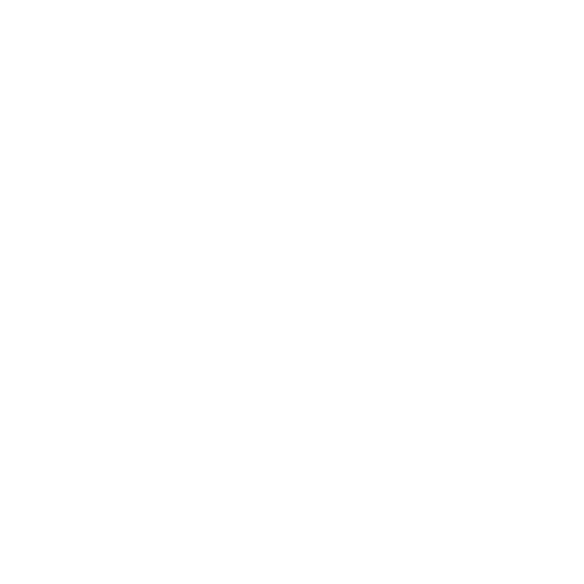

In [38]:
B1 = Body(1,0,0,1.556,4)
B2 = Body(-1,0,0,-1.556,4)
B3 = Body(0,0,0.001556,0,1)
sim = Simulation(0.01, [B1, B2, B3], 10)